In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("healthcare-dataset-stroke-data-cleaned.csv")

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000
mean,43.274241,0.092760,0.049979,105.374130,28.995043,0.042986
std,22.275257,0.290126,0.217925,44.534054,7.815051,0.202847
min,1.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.072500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.545000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:>

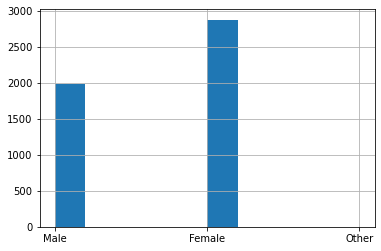

In [11]:
df.gender.hist()

<AxesSubplot:>

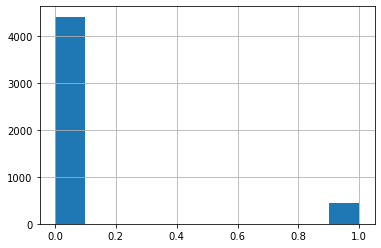

In [12]:
df.hypertension.hist()

<AxesSubplot:>

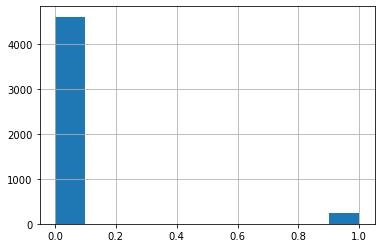

In [13]:
df.heart_disease.hist()

<AxesSubplot:>

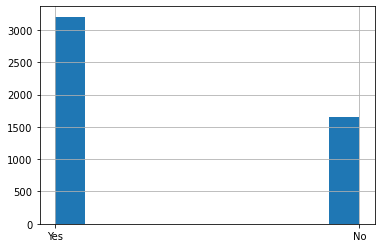

In [14]:
df.ever_married.hist()

<AxesSubplot:>

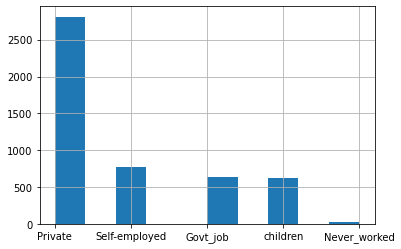

In [15]:
df.work_type.hist()

<AxesSubplot:>

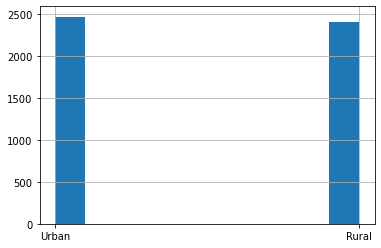

In [16]:
df.Residence_type.hist()

<AxesSubplot:>

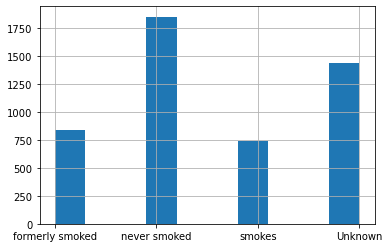

In [17]:
df.smoking_status.hist()

<AxesSubplot:>

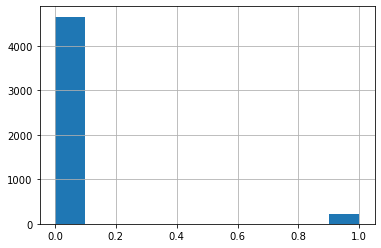

In [18]:
df.stroke.hist()

In [19]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [20]:
df[['hypertension', 'heart_disease', 'smoking_status', 'stroke', 'Residence_type']].corr()

,hypertension,heart_disease,stroke
hypertension,1.000000,0.115375,0.141966
heart_disease,0.115375,1.000000,0.137537
stroke,0.141966,0.137537,1.000000


<AxesSubplot:>

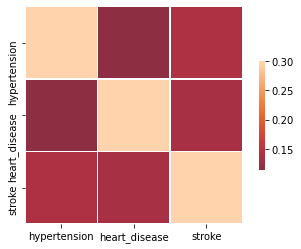

In [21]:
sns.heatmap(df[['hypertension', 'heart_disease', 'smoking_status', 'stroke', 'Residence_type']].corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5} )

In [28]:
df_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status', 'stroke']]

Graph for gender: total = 3


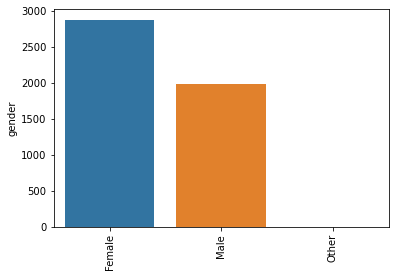

Graph for hypertension: total = 2


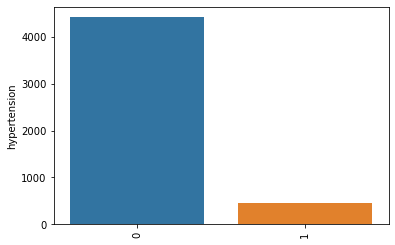

Graph for heart_disease: total = 2


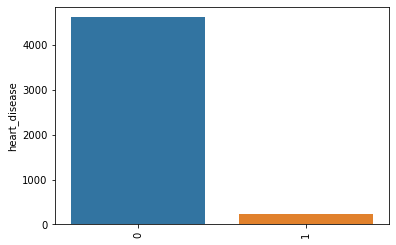

Graph for ever_married: total = 2


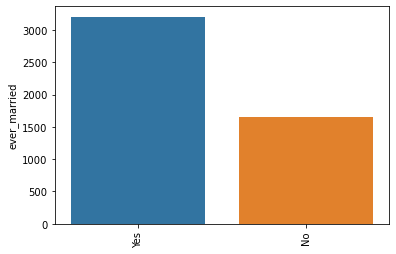

Graph for work_type: total = 5


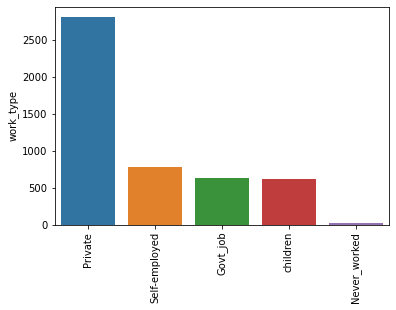

Graph for Residence_type: total = 2


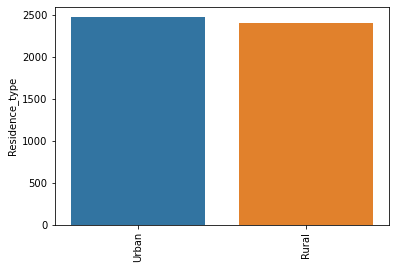

Graph for smoking_status: total = 4


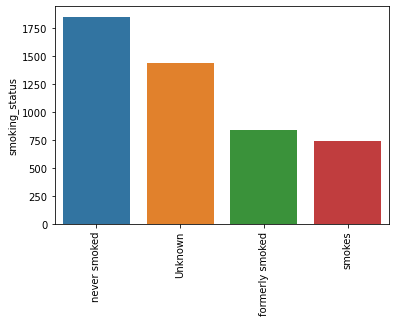

Graph for stroke: total = 2


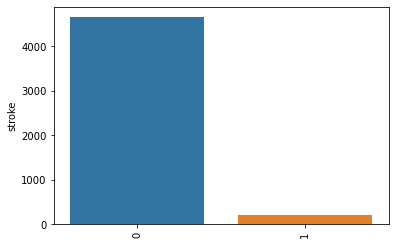

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
df.hypertension.value_counts()

0    4411
1     451
Name: hypertension, dtype: int64

In [36]:
pd.pivot_table(df, index = 'hypertension', values = 'stroke', aggfunc = 'count')

,stroke
hypertension,
0,4411
1,451


In [40]:
pd.pivot_table(df, index = ['hypertension', 'heart_disease', 'work_type', 'smoking_status'] , values = 'stroke', aggfunc = 'count')

stroke
hypertension heart_disease work_type     smoking_status         
0            0             Govt_job      Unknown             109
                                         formerly smoked     105
                                         never smoked        232
                                         smokes               94
                           Never_worked  Unknown               8
                                         never smoked         14
                           Private       Unknown             575
                                         formerly smoked     418
                                         never smoked       1029
                                         smokes              430
                           Self-employed Unknown             113
                                         formerly smoked     142
                                         never smoked        246
                                         smokes               88
                           children      Unknown             555
                                         formerly smoked      12
                                         never smoked         54
                                         smokes                2
             1             Govt_job      Unknown               4
                                         formerly smoked       3
                                         never smoked         11
                                         smokes                5
                           Private       Unknown              11
                                         formerly smoked      28
                                         never smoked         39
                                         smokes               26
                           Self-employed Unknown              17
                                         formerly smoked      19
                                         never smoked         11
                                         smokes               10
                           children      Unknown               1
1            0             Govt_job      Unknown               3
                                         formerly smoked      15
                                         never smoked         27
                                         smokes               12
                           Private       Unknown              21
                                         formerly smoked      43
                                         never smoked        112
                                         smokes               44
                           Self-employed Unknown              15
                                         formerly smoked      32
                                         never smoked         57
                                         smokes               12
             1             Govt_job      formerly smoked       3
                                         never smoked          5
                                         smokes                2
                           Private       Unknown               3
                                         formerly smoked      13
                                         never smoked         11
                                         smokes                8
                           Self-employed Unknown               1
                                         formerly smoked       4
                                         never smoked          4
                                         smokes                4

In [42]:
pd.pivot_table(df, index = ['smoking_status','work_type'] , values = 'stroke', aggfunc = 'count')

stroke
smoking_status  work_type            
Unknown         Govt_job          116
                Never_worked        8
                Private           610
                Self-employed     146
                children          556
formerly smoked Govt_job          126
                Private           502
                Self-employed     197
                children           12
never smoked    Govt_job          275
                Never_worked       14
                Private          1191
                Self-employed     318
                children           54
smokes          Govt_job          113
                Private           508
                Self-employed     114
                children            2